In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

In [93]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [94]:
df.sample(5) # Random 5

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1412,ham,"Wen ur lovable bcums angry wid u, dnt take it ...",NaN,NaN,NaN
4751,ham,Well boy am I glad G wasted all night at apple...,NaN,NaN,NaN
4294,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,NaN,NaN,NaN
1348,ham,"Nothing much, chillin at home. Any super bowl ...",NaN,NaN,NaN
4797,ham,Just come home. I don't want u to be miserable,NaN,NaN,NaN


In [95]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [96]:
df.shape

(5572, 5)

In [97]:
# Data cleaning
# EDA
# Text Preprocessing
# Model Building
# Evaluation
# Improvement
# Website
# Deployment

**Data cleaning**

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [99]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [100]:
df.sample(2)

,v1,v2
5332,ham,I think steyn surely get one wicket:)
4478,ham,Erutupalam thandiyachu


In [101]:
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)

In [102]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [104]:
# 0 = ham
# 1 = spam

In [105]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df.isna().sum()

,0
target,0
text,0


In [107]:
df.duplicated().sum()

np.int64(403)

In [108]:
df=df.drop_duplicates(keep='first')
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
df.shape

(5169, 2)

**EDA**

In [110]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df['target'].value_counts()

,count
target,
0,4516
1,653


<Axes: xlabel='target'>

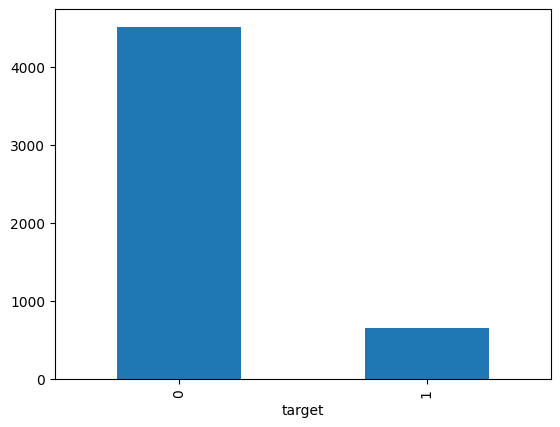

In [112]:
df['target'].value_counts().plot(kind='bar')

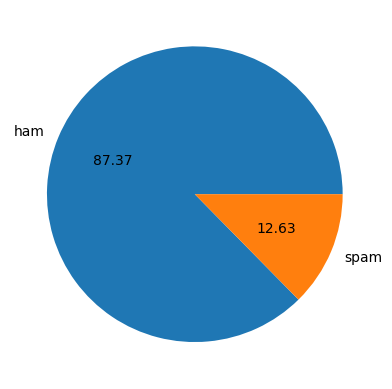

In [113]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'], autopct='%0.2f')
plt.show()

Data is imbalanced because there are many numbers of ham than spam which is not fair


In [114]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [115]:
df['num_characters']=df['text'].apply(len) # length of characters used

In [116]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [117]:
# sentence into words
df['text'].apply(lambda x: nltk.word_tokenize(x))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [118]:
# len of words used in per sms
df['num_of_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [119]:
df.head()

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [120]:
# no of sentences used per sms
df['num_of_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [121]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [122]:
df.describe()

,target,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [123]:
df.loc[df['num_characters'].idxmax()]

,1084
target,0
text,For me the love should start with attraction.i...
num_characters,910
num_of_words,175
num_of_sentences,1


In [124]:
# for ham messages
df[df['target'] ==0].describe()

,target,num_characters,num_of_words,num_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [125]:
# for spam messages
df[df['target'] == 1].describe()

,target,num_characters,num_of_words,num_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

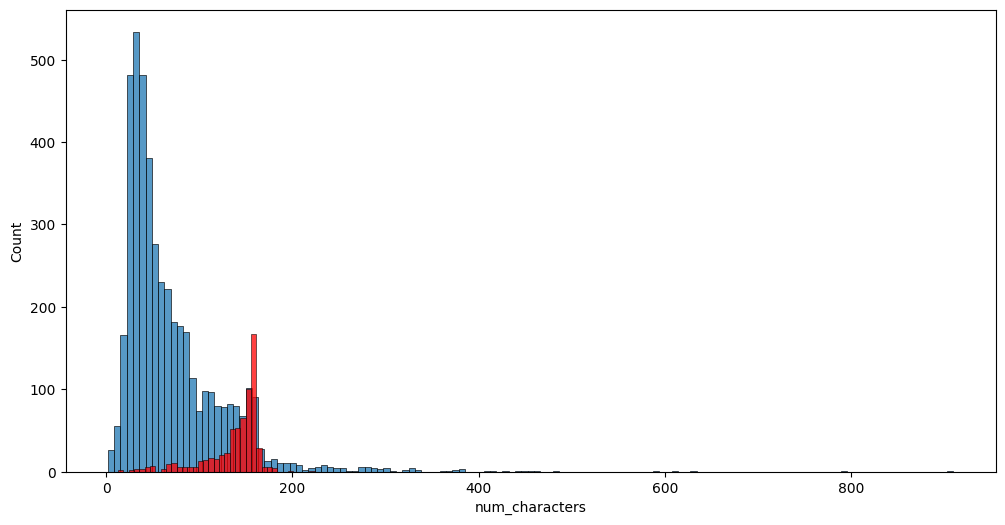

In [126]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_of_words', ylabel='Count'>

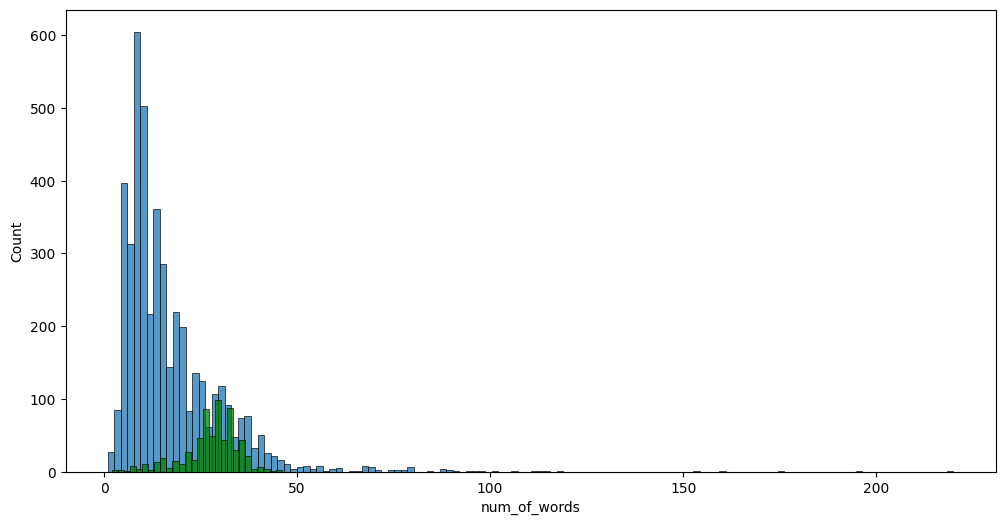

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'], color='green')

<Axes: xlabel='num_of_sentences', ylabel='Count'>

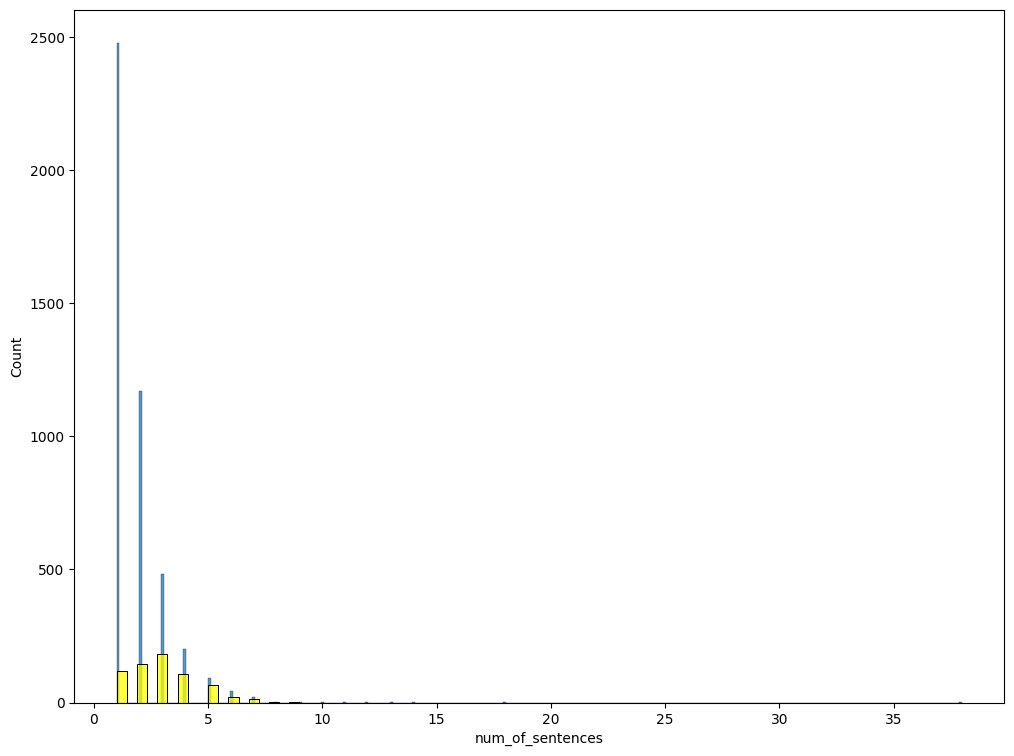

In [128]:
plt.figure(figsize=(12,9))
sns.histplot(df[df['target']==0]['num_of_sentences'])
sns.histplot(df[df['target']==1]['num_of_sentences'], color='yellow')

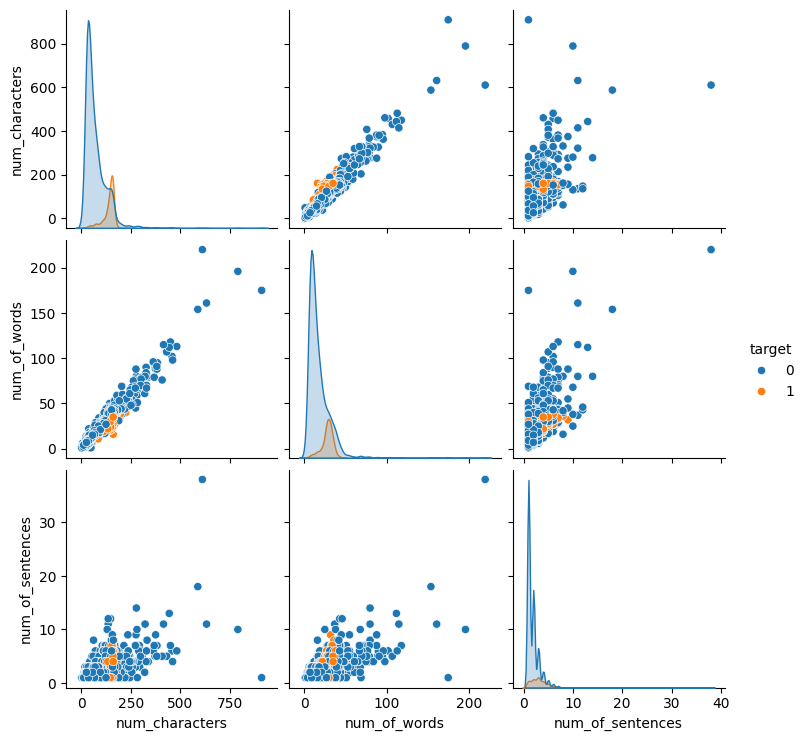

In [129]:
# relationship between columns
sns.pairplot(df, hue='target')

In [130]:
df.corr(numeric_only=True)

,target,num_characters,num_of_words,num_of_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_of_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

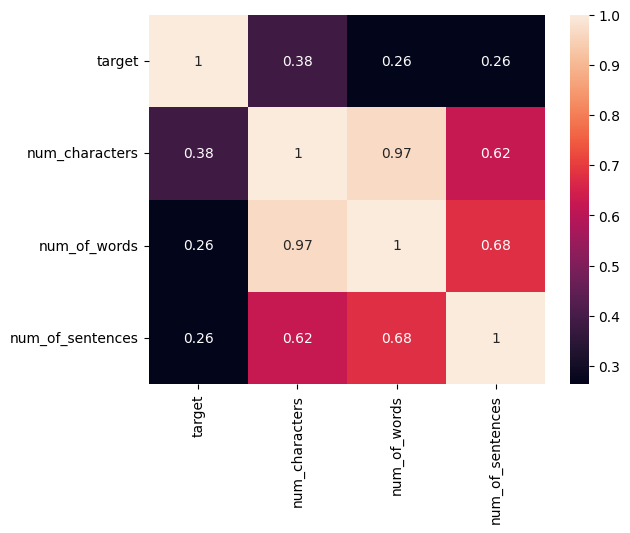

In [131]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

I can see multicollinearity here.There is strong correlation between the columns. If we have to keep one I will keep num_characters because the relation with target variable is high.

**DATA PREPROCESSING**

In [132]:
# Lowercase
# Tokenization
# Removing special characters
# Removing tsop words and punctutaion
# stemming

In [133]:
import string
ps = PorterStemmer()
wn = WordNetLemmatizer()

# function
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y =[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [134]:
df['Transformed_text'] = df['text'].apply(transform_text)

In [135]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Word cloud**: Display the most imp words in image with big size

In [136]:
!pip install wordcloud

In [137]:
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc=wc.generate(df[df['target']==1]['Transformed_text'].str.cat(sep= ' '))

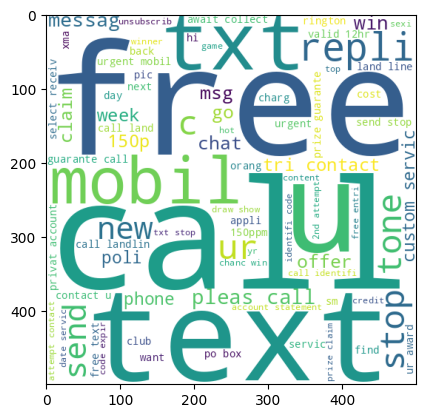

In [138]:
plt.imshow(spam_wc)

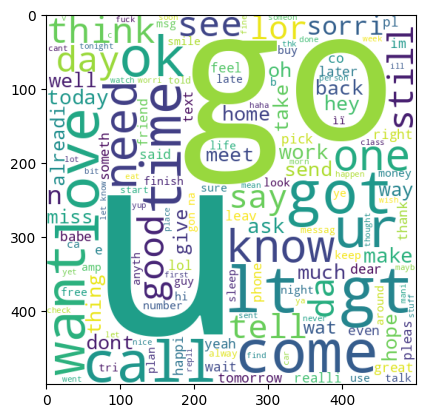

In [139]:
ham_wc = wc.generate(df[df['target']==0]['Transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

Most used 30 words in spam/ham messages

In [140]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
# For spam messages top 30 words

In [142]:
spam_corpus=[]
for msg in df[df['target']==1]['Transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [143]:
len(spam_corpus)

9939

In [144]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


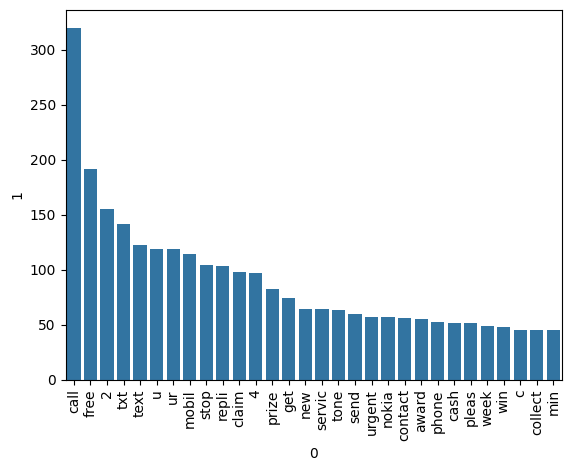

In [145]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [146]:
# for ham messages top 30 words

In [147]:
ham_corpus =[]
for msg in df[df['target']==0]['Transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [148]:
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


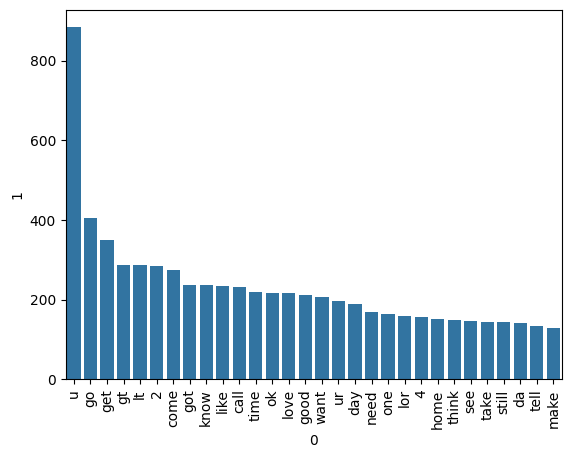

In [149]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

**Model Building**

In [198]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

Firstly I will try with count vectorizer

In [151]:
X=cv.fit_transform(df['Transformed_text']).toarray()

In [152]:
X.shape

(5169, 6708)

In [153]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [154]:
y = df['target'].values

In [155]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [157]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [158]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [159]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred1)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred1)}')
print(f'precision score: {precision_score(y_test,y_pred1)}')

accuracy score: 0.8800773694390716
confusion matrix: [[792 104]
 [ 20 118]]
precision score: 0.5315315315315315


In [160]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred2)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred2)}')
print(f'precision score: {precision_score(y_test,y_pred2)}')

accuracy score: 0.9642166344294004
confusion matrix: [[871  25]
 [ 12 126]]
precision score: 0.8344370860927153


In [161]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred3)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred3)}')
print(f'precision score: {precision_score(y_test,y_pred3)}')

accuracy score: 0.9700193423597679
confusion matrix: [[893   3]
 [ 28 110]]
precision score: 0.9734513274336283


Now lets try with tfidf vectorizer

In [199]:
X=tfidf.fit_transform(df['Transformed_text']).toarray()

In [200]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
X.shape

(5169, 3000)

In [202]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.2)

In [204]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred1)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred1)}')
print(f'precision score: {precision_score(y_test,y_pred1)}')

accuracy score: 0.8733075435203095
confusion matrix: [[790 106]
 [ 25 113]]
precision score: 0.5159817351598174


In [205]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred2)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred2)}')
print(f'precision score: {precision_score(y_test,y_pred2)}')

accuracy score: 0.9709864603481625
confusion matrix: [[896   0]
 [ 30 108]]
precision score: 1.0


It is giving perfect precision score and pretty good accuracy score

In [169]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(f'accuracy score: {accuracy_score(y_test,y_pred3)}')
print(f'confusion matrix: {confusion_matrix(y_test,y_pred3)}')
print(f'precision score: {precision_score(y_test,y_pred3)}')

accuracy score: 0.9835589941972921
confusion matrix: [[895   1]
 [ 16 122]]
precision score: 0.991869918699187


Till now tfidf vectorizer with Multinomial naive bayes is giving the best precision score for me

In [170]:
# Now lets see what other algos will give us

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [172]:
# Hyper parameter tuning
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [173]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [174]:
def train_classifer(clf, X_train, y_train, X_test, y_test):
  '''
  This will find the accuracy and precision scores using
  all the algos mentioned above

  '''

  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy, precision


In [175]:
train_classifer(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [176]:
clfs.items()

dict_items([('SVC', SVC(gamma=1.0, kernel='sigmoid')), ('KN', KNeighborsClassifier()), ('NB', MultinomialNB()), ('DT', DecisionTreeClassifier(max_depth=5)), ('LR', LogisticRegression(penalty='l1', solver='liblinear')), ('RF', RandomForestClassifier(n_estimators=50, random_state=2)), ('AdaBoost', AdaBoostClassifier(random_state=2)), ('BgC', BaggingClassifier(n_estimators=50, random_state=2)), ('ETC', ExtraTreesClassifier(n_estimators=50, random_state=2)), ('GBDT', GradientBoostingClassifier(n_estimators=50, random_state=2)), ('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_

In [177]:
import warnings as war
war.filterwarnings('ignore')

It returns name,clf

In [182]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy, current_precision = train_classifer(clf,X_train,y_train,X_test,y_test)

  print('for:', name)
  print('Accuracy:', current_accuracy)
  print('precision:', current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

for: SVC
Accuracy: 0.9758220502901354
precision: 0.9747899159663865
for: KN
Accuracy: 0.9052224371373307
precision: 1.0
for: NB
Accuracy: 0.9709864603481625
precision: 1.0
for: DT
Accuracy: 0.9303675048355899
precision: 0.8367346938775511
for: LR
Accuracy: 0.9564796905222437
precision: 0.9696969696969697
for: RF
Accuracy: 0.97678916827853
precision: 0.975
for: AdaBoost
Accuracy: 0.9235976789168279
precision: 0.8390804597701149
for: BgC
Accuracy: 0.9593810444874274
precision: 0.8692307692307693
for: ETC
Accuracy: 0.9777562862669246
precision: 0.967479674796748
for: GBDT
Accuracy: 0.9506769825918762
precision: 0.9306930693069307
for: xgb
Accuracy: 0.9709864603481625
precision: 0.95


In [183]:
performance_df=pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores, 'precision':precision_scores})

In [186]:
performance_df.sort_values('precision', ascending=False)

,Algorithm,Accuracy,precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.976789,0.975000
0,SVC,0.975822,0.974790
4,LR,0.956480,0.969697
8,ETC,0.977756,0.967480
10,xgb,0.970986,0.950000
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.869231
6,AdaBoost,0.923598,0.839080


In my opinion NB will be the perfect model based on my analysis

In [188]:
# Lets try voting classifier also

In [189]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [190]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)], voting='soft')

In [192]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [193]:
pred = voting.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test,pred)}')
print(f'Precision: {precision_score(y_test,pred)}')

Accuracy: 0.9796905222437138
Precision: 0.9834710743801653


In [194]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [195]:
from sklearn.ensemble import StackingClassifier

In [196]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [197]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.946969696969697


In [206]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))